In [182]:
import os
os.chdir("C:\\Users\\vgonsalv\\Desktop\\DataScience\\analytics vidhya\\Project\\Big Mart Sales III")
os.getcwd()

'C:\\Users\\vgonsalv\\Desktop\\DataScience\\analytics vidhya\\Project\\Big Mart Sales III'

In [183]:
import pandas as pd
df=pd.read_csv('Train_big_mart.txt',header=0,sep=',',na_values=[""," ","NA","NaN"])

In [17]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [184]:
#check types...all ok..except for Outlet_Establishment_Year which is converted below
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [185]:
#drop identifier...no value
df=df.drop(['Item_Identifier'],axis=1)

In [186]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [187]:
df['Outlet_Establishment_Year'].value_counts()
#---fixed numvber of establishment counts hence convert to object
df['Outlet_Establishment_Year'] =  df['Outlet_Establishment_Year'].astype(object)

In [188]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

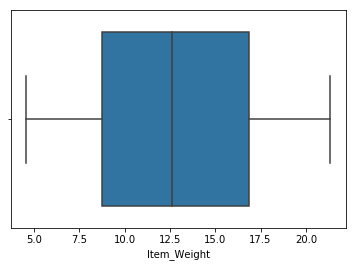

In [189]:
#---OA for num values
import seaborn as sns
import numpy as np  
sns.boxplot(df['Item_Weight'])
df["Item_Weight"].describe()

In [190]:
q25=8.773750
q75=16.850000
iqr=q75-q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)
df['Item_Weight'][df['Item_Weight']<min] = np.nan
df['Item_Weight'][df['Item_Weight']>max] = np.nan

-3.340625000000003
28.964375000000004


C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [46]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

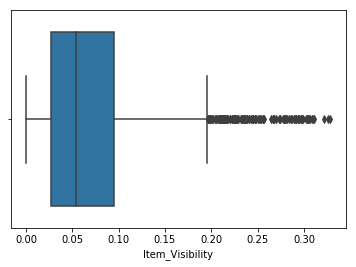

In [191]:
sns.boxplot(df['Item_Visibility'])
df["Item_Visibility"].describe()

In [192]:
q25=0.026989
q75=0.094585
iqr=q75-q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)
df['Item_Visibility'][df['Item_Visibility']<min] = np.nan
df['Item_Visibility'][df['Item_Visibility']>max] = np.nan

-0.07440500000000001
0.19597900000000001


C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [50]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

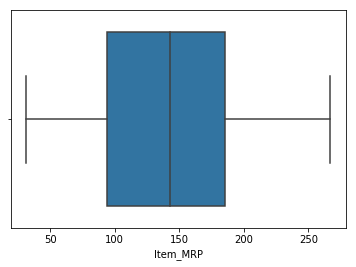

In [193]:
sns.boxplot(df['Item_MRP'])
df["Item_MRP"].describe()

In [194]:
q25=93.826500
q75=185.643700
iqr=q75-q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)
df['Item_MRP'][df['Item_MRP']<min] = np.nan
df['Item_MRP'][df['Item_MRP']>max] = np.nan

-43.8993
323.3695


C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [57]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [199]:
missing_val=pd.DataFrame(df.isnull().sum())
missing_val=missing_val.reset_index()
#Renaming Variable
missing_val = missing_val.rename(columns = {'index':'Variable Name', 0 : 'Missing-Percentage'})
#Calculating Missing Value Percentage
missing_val['Missing-Percentage'] = (missing_val['Missing-Percentage']/len(df))*100
missing_val
#item visibility is less tahn 2 %..drop those values
#for item weight and outlet_size...impute

,Variable Name,Missing-Percentage
0,Item_Weight,0.0
1,Item_Fat_Content,0.0
2,Item_Visibility,0.0
3,Item_Type,0.0
4,Item_MRP,0.0
5,Outlet_Identifier,0.0
6,Outlet_Establishment_Year,0.0
7,Outlet_Size,0.0
8,Outlet_Location_Type,0.0
9,Outlet_Type,0.0


In [196]:
df=df.dropna(subset=['Item_Visibility'])

In [197]:
copy_df=df.copy()
copy_df['Item_Weight'].iloc[108]
copy_df['Item_Weight'].iloc[108]=np.nan #value=8.89
copy_df['Item_Weight'].iloc[108]
copy_df['Item_Weight'] = copy_df['Item_Weight'].fillna(copy_df['Item_Weight'].mean())
copy_df['Item_Weight'].iloc[108]#value 12.866
copy_df=df.copy()
copy_df['Item_Weight'].iloc[108]
copy_df['Item_Weight'].iloc[108]=np.nan #value=8.89
copy_df['Item_Weight'] = copy_df['Item_Weight'].fillna(copy_df['Item_Weight'].median())
copy_df['Item_Weight'].iloc[108]#value 12.6
#take mean for MVA
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].median())

C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [198]:
#checking the test data even there outlet size has missing values..so we introduce a new category 'Missing' for mising vals
#and let algo take care of them both in train and test data
df['Outlet_Size'] = df['Outlet_Size'].fillna('Missing')
df['Outlet_Size'].value_counts()

Medium     2793
Missing    2343
Small      2311
High        932
Name: Outlet_Size, dtype: int64

In [200]:
#check if item_mrp or item_weight <0..i.e.absurd values
df.ix[(df['Item_MRP']<0.1)|(df['Item_MRP']<0.1)]

C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [201]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [202]:
#check corelation of num variables
cnames=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
df_corr=df.loc[:,cnames]
corr=df_corr.corr()
corr
#--no corelation found

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.008799,0.025693,0.007396
Item_Visibility,-0.008799,1.000000,-0.002377,-0.073755
Item_MRP,0.025693,-0.002377,1.000000,0.577367
Item_Outlet_Sales,0.007396,-0.073755,0.577367,1.000000


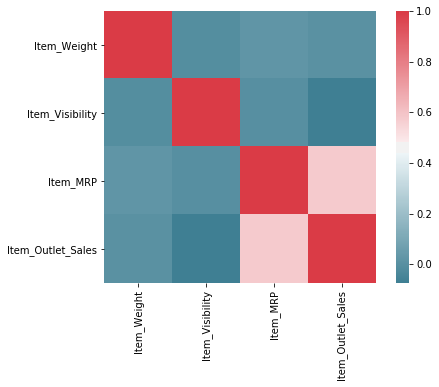

In [203]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(figsize=(7,5))
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

In [204]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [205]:
#feature selection for categorical vars
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('Item_Outlet_Sales ~ Item_Fat_Content', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Item_Fat_Content,2.320660e+07,4.0,2.000066,0.091674
Residual,2.429071e+10,8374.0,NaN,NaN


In [206]:
mod = ols('Item_Outlet_Sales ~ Item_Type', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Item_Type,1.234530e+08,15.0,2.845302,0.000181
Residual,2.419046e+10,8363.0,NaN,NaN


In [207]:
mod = ols('Item_Outlet_Sales ~ Outlet_Identifier', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Outlet_Identifier,5.481693e+09,9.0,270.672534,0.0
Residual,1.883222e+10,8369.0,NaN,NaN


In [208]:
mod = ols('Item_Outlet_Sales ~ Outlet_Establishment_Year', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Outlet_Establishment_Year,2.053779e+09,8.0,96.529772,2.966398e-154
Residual,2.226014e+10,8370.0,NaN,NaN


In [209]:
mod = ols('Item_Outlet_Sales ~ Outlet_Size', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Outlet_Size,1.046561e+09,3.0,125.568665,1.469693e-79
Residual,2.326735e+10,8375.0,NaN,NaN


In [210]:
mod = ols('Item_Outlet_Sales ~ Outlet_Location_Type', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Outlet_Location_Type,2.598753e+08,2.0,45.246364,2.851966e-20
Residual,2.405404e+10,8376.0,NaN,NaN


In [211]:
mod = ols('Item_Outlet_Sales ~ Outlet_Type', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Outlet_Type,5.450299e+09,3.0,806.601365,0.0
Residual,1.886362e+10,8375.0,NaN,NaN


In [212]:
df = df.drop(['Item_Fat_Content'], axis=1)

In [213]:
df.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [214]:
#check for multicollnearity
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
outcome, predictors = dmatrices('Item_Outlet_Sales ~ Item_Weight+Item_Visibility+Item_Type+Item_MRP +Outlet_Identifier+Outlet_Establishment_Year+Outlet_Size+Outlet_Location_Type+Outlet_Type',df, return_type='dataframe')
# calculating VIF for each individual Predictors
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,0.000000,Intercept
1,1.355016,Item_Type[T.Breads]
2,1.155687,Item_Type[T.Breakfast]
3,1.861627,Item_Type[T.Canned]
4,1.910520,Item_Type[T.Dairy]
5,2.108093,Item_Type[T.Frozen Foods]
6,2.509328,Item_Type[T.Fruits and Vegetables]
7,1.303305,Item_Type[T.Hard Drinks]
8,1.711607,Item_Type[T.Health and Hygiene]
9,2.181165,Item_Type[T.Household]


(array([574., 330., 480., 538., 616., 554., 520., 461., 398., 352., 345.,
        354., 373., 234., 268., 231., 210., 168., 175., 182., 172., 122.,
        151.,  91.,  88., 116.,  68.,  99.,  39.,  53.,  17.]),
 array([0.        , 0.00631358, 0.01262717, 0.01894075, 0.02525434,
        0.03156792, 0.03788151, 0.04419509, 0.05050868, 0.05682226,
        0.06313585, 0.06944943, 0.07576302, 0.0820766 , 0.08839019,
        0.09470377, 0.10101735, 0.10733094, 0.11364452, 0.11995811,
        0.12627169, 0.13258528, 0.13889886, 0.14521245, 0.15152603,
        0.15783962, 0.1641532 , 0.17046679, 0.17678037, 0.18309396,
        0.18940754, 0.19572112]),
 <a list of 31 Patch objects>)

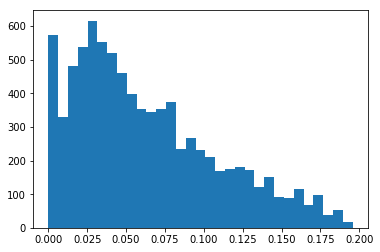

In [215]:
#feature scaling of num values
#item_weight and Item_MRP is unformly dist..so go for stdisation.Item_Visibility is sparsely dist so go for normalisation
%matplotlib inline
plt.hist(df['Item_Visibility'],bins='auto')

In [216]:
cnames=['Item_Weight','Item_MRP']
for i in cnames:
    print(i)
    df[i]=(df[i]-df[i].mean())/df[i].std()

Item_Weight
Item_MRP


In [217]:
#convert cat var to 0 and 1 i.e. binning
cat_names=['Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in cat_names:
    print(i)
    df[i]=pd.Categorical(df[i])
    df[i]=df[i].cat.codes
    df[i]=df[i].astype(object)

Item_Type
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [218]:
df.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [219]:
df['Outlet_Type'].value_counts()

1    5577
0     939
3     935
2     928
Name: Outlet_Type, dtype: int64

In [118]:
df

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.830084,0.016047,4,1.747821,9,4,1,0,1,3735.1380
1,-1.626661,0.019278,14,-1.488613,3,8,1,2,2,443.4228
2,1.102440,0.016760,10,0.010430,9,4,1,0,1,2097.2700
3,1.503085,0.000000,6,0.660431,0,3,2,2,0,732.3800
4,-0.917283,0.000000,9,-1.398810,1,1,0,2,1,994.7052
5,-0.572021,0.000000,0,-1.438324,3,8,1,2,2,556.6088
6,0.195096,0.012741,13,-1.337830,1,1,0,2,1,343.5528
7,-0.052361,0.127470,13,-0.533243,5,0,1,2,3,4022.7636
8,0.796064,0.016687,5,-0.706508,7,5,2,1,1,1076.5986
9,1.503085,0.094450,5,0.752389,2,7,2,1,1,4710.5350


In [234]:
df['Outlet_Identifier'].value_counts()


0    935
1    932
2    930
4    930
3    930
5    929
6    928
7    926
8    488
9    451
Name: Outlet_Identifier, dtype: int64

In [ ]:
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT027','0')
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT013','1')
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT035','2')
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT049','3')
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT046','4')
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT045','5')
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT018','6')
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT017','7')
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT010','8')
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT019','9')

In [235]:
#stratify on outlet type as its highly skewed
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
y = np.array(df['Outlet_Type'])
train_set,validation_set = train_test_split(df, test_size = 0.2, stratify = y) 

In [237]:
train_set.iloc[:,9].head(3)

6176     495.3552
1269    3425.5410
4663    3207.8244
Name: Item_Outlet_Sales, dtype: float64

In [238]:
train_set.iloc[:,0:9].head(3)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
6176,0.536823,0.094037,6,-1.262987,3,4,1,0,1
1269,-1.149422,0.015908,13,0.328437,5,5,2,1,1
4663,-0.052361,0.024390,1,-0.723624,0,0,1,2,3


In [239]:
train_set.head(3)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6176,0.536823,0.094037,6,-1.262987,3,4,1,0,1,495.3552
1269,-1.149422,0.015908,13,0.328437,5,5,2,1,1,3425.5410
4663,-0.052361,0.024390,1,-0.723624,0,0,1,2,3,3207.8244


In [240]:
validation_set.iloc[:,0:9].head(3)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
373,-0.900786,0.065237,13,0.569572,2,6,3,1,1
3055,-0.860722,0.172365,0,0.062283,8,3,2,2,0
7661,-0.854830,0.048051,9,-0.566966,2,6,3,1,1


In [241]:
#decision tree model
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train_set.iloc[:,0:9], train_set.iloc[:,9])
predictions_DT = fit_DT.predict(validation_set.iloc[:,0:9])

In [242]:
def rmse(targets,predictions): 
    return np.sqrt(((predictions - targets) ** 2).mean())

In [243]:
rmse(validation_set.iloc[:,9],predictions_DT)

1273.4758188725455

In [244]:
RF_model = RandomForestRegressor(n_estimators = 600).fit(train_set.iloc[:,0:9], train_set.iloc[:,9])
RF_Predictions = RF_model.predict(validation_set.iloc[:,0:9])

In [245]:
rmse(validation_set.iloc[:,9],RF_Predictions)

1127.988491821722

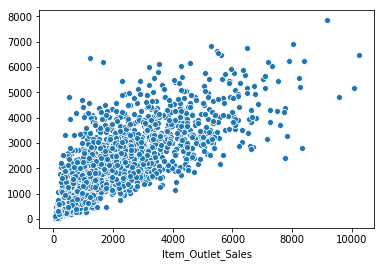

In [247]:
sns.scatterplot(x=validation_set["Item_Outlet_Sales"], y=RF_Predictions)

In [248]:
df_test=pd.read_csv('Test_big_mart.txt',header=0,sep=',',na_values=[""," ","NA","NaN"])

In [249]:
df_test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [253]:
missing_val=pd.DataFrame(df_test.isnull().sum())
missing_val=missing_val.reset_index()
#Renaming Variable
missing_val = missing_val.rename(columns = {'index':'Variable Name', 0 : 'Missing-Percentage'})
#Calculating Missing Value Percentage
missing_val['Missing-Percentage'] = (missing_val['Missing-Percentage']/len(df_test))*100
missing_val

,Variable Name,Missing-Percentage
0,Item_Identifier,0.0
1,Item_Weight,0.0
2,Item_Fat_Content,0.0
3,Item_Visibility,0.0
4,Item_Type,0.0
5,Item_MRP,0.0
6,Outlet_Identifier,0.0
7,Outlet_Establishment_Year,0.0
8,Outlet_Size,0.0
9,Outlet_Location_Type,0.0


In [251]:
df_test['Item_Weight'] = df_test['Item_Weight'].fillna(df_test['Item_Weight'].median())

In [252]:
df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna('Missing')
df_test['Outlet_Size'].value_counts()

Medium     1862
Missing    1606
Small      1592
High        621
Name: Outlet_Size, dtype: int64

In [254]:
df_test['Outlet_Establishment_Year'] =  df_test['Outlet_Establishment_Year'].astype(object)
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [255]:
df_test = df_test.drop(['Item_Fat_Content'], axis=1)

In [256]:
cnames=['Item_Weight','Item_MRP']
for i in cnames:
    print(i)
    df_test[i]=(df_test[i]-df_test[i].mean())/df_test[i].std()

Item_Weight
Item_MRP


In [257]:
cat_names=['Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','']
for i in cat_names:
    print(i)
    df_test[i]=pd.Categorical(df_test[i])
    df_test[i]=df_test[i].cat.codes
    df_test[i]=df_test[i].astype(object)

Item_Type
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type
Outlet_Type



KeyError: ''

In [262]:
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('OUT027','0')
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('OUT013','1')
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('OUT035','2')
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('OUT049','3')
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('OUT046','4')
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('OUT045','5')
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('OUT018','6')
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('OUT017','7')
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('OUT010','8')
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('OUT019','9')

In [263]:
df_test['Outlet_Identifier'].value_counts()

0    624
1    621
2    620
4    620
3    620
5    619
6    618
7    617
8    370
9    352
Name: Outlet_Identifier, dtype: int64

In [264]:
df_test.iloc[:,1:10].head(3)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.904922,0.007565,13,-0.536508,3,4,1,0,1
1,-1.027366,0.038428,4,-0.868860,7,7,2,1,1
2,0.456442,0.099575,11,1.629704,8,3,2,2,0


In [265]:
validation_set.iloc[:,0:9].head(3)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
373,-0.900786,0.065237,13,0.569572,2,6,3,1,1
3055,-0.860722,0.172365,0,0.062283,8,3,2,2,0
7661,-0.854830,0.048051,9,-0.566966,2,6,3,1,1


In [266]:
df_test['Item_Outlet_Sales'] = RF_model.predict(df_test.iloc[:,1:10])


In [267]:
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('0','OUT027')
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('1','OUT013')
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('2','OUT035')
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('3','OUT049')
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('4','OUT046')
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('5','OUT045')
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('6','OUT018')
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('7','OUT017')
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('8','OUT010')
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace('9','OUT019')

In [271]:
df_test.to_csv("SampleSubmission.txt",index=False,sep=',',columns=('Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'))
df_test.to_csv("SampleSubmission.csv",index=False,sep=',',columns=('Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'))

In [268]:
df_test.head(3)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,1.904922,0.007565,13,-0.536508,OUT049,4,1,0,1,1646.482342
1,FDW14,-1.027366,0.038428,4,-0.868860,OUT017,7,2,1,1,1556.397383
2,NCN55,0.456442,0.099575,11,1.629704,OUT010,3,2,2,0,501.791267
